In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si

In [ ]:
tickers = ['VDE', 'VNQ', 'VAW', 'VPU', 'VDC', 'VFH', 'VOX', 'VCR', 'VHT', 'VGT']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [ ]:
mydata.info()

In [64]:
mydata.head()

,VDE,VNQ,VAW,VPU,VDC,VFH,VOX,VCR,VHT,VGT
Date,,,,,,,,,,
2004-09-29,34.443905,23.262310,38.929596,29.638336,33.524792,34.275875,32.393944,38.887505,37.850113,35.776405
2004-09-30,34.754086,23.448965,39.478409,29.727026,33.883976,34.350780,32.446453,39.375626,37.283661,35.862373
2004-10-01,35.202133,23.882944,39.774475,29.982004,34.229885,34.793457,32.446453,39.880032,37.677032,37.014240
2004-10-04,35.236595,23.985615,39.904453,30.031885,34.296391,34.936462,32.446453,40.181046,37.936653,37.564373
2004-10-05,35.560555,23.980936,39.803368,30.176010,34.123455,34.732151,32.446453,39.920723,37.684898,37.323681


In [65]:
mydata.tail()

,VDE,VNQ,VAW,VPU,VDC,VFH,VOX,VCR,VHT,VGT
Date,,,,,,,,,,
2022-01-27,90.980003,101.660004,179.339996,146.619995,192.419998,93.629997,120.529999,289.950012,236.850006,393.089996
2022-01-28,90.790001,104.949997,180.309998,148.389999,194.770004,94.870003,123.970001,296.209991,242.279999,409.839996
2022-01-31,91.180000,106.239998,183.009995,151.149994,195.750000,96.019997,127.300003,307.440002,245.339996,422.260010
2022-02-01,94.529999,105.860001,186.160004,149.119995,195.699997,97.320000,128.750000,309.839996,246.279999,424.010010
2022-02-02,94.839996,107.209999,186.710007,151.330002,197.639999,97.779999,130.619995,307.839996,248.570007,426.209991


In [66]:
mydata.iloc[0]

VDE    34.443905
VNQ    23.262310
VAW    38.929596
VPU    29.638336
VDC    33.524792
VFH    34.275875
VOX    32.393944
VCR    38.887505
VHT    37.850113
VGT    35.776405
Name: 2004-09-29 00:00:00, dtype: float64

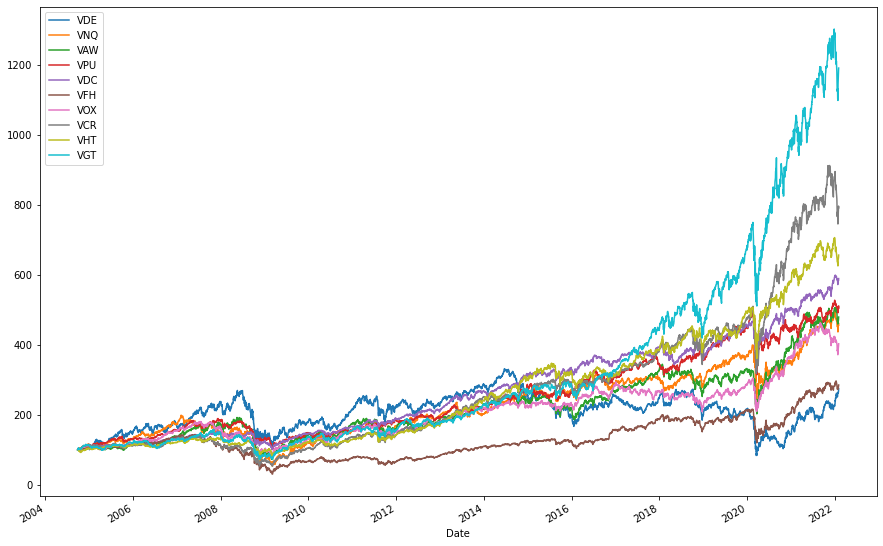

In [70]:
#Normalized all equities to 100
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 10))
plt.show()

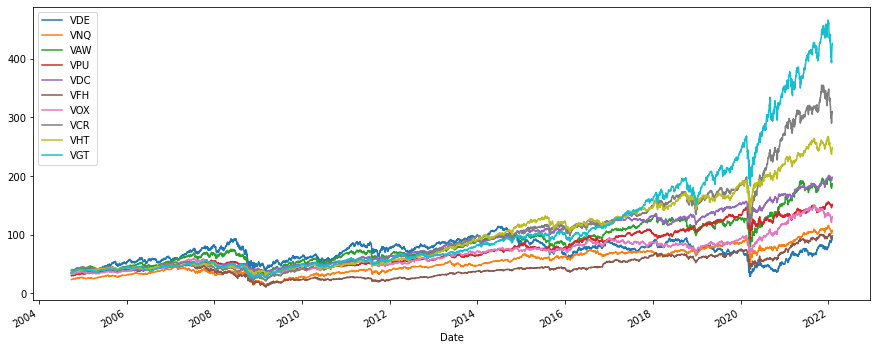

In [56]:
#Not normalized to 100
mydata.plot(figsize=(15, 6))
plt.show()

In [57]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,VDE,VNQ,VAW,VPU,VDC,VFH,VOX,VCR,VHT,VGT
Date,,,,,,,,,,
2004-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-09-30,0.009005,0.008024,0.014098,0.002992,0.010714,0.002185,0.001621,0.012552,-0.014966,0.002403
2004-10-01,0.012892,0.018507,0.007499,0.008577,0.010209,0.012887,0.000000,0.012810,0.010551,0.032119
2004-10-04,0.000979,0.004299,0.003268,0.001664,0.001943,0.004110,0.000000,0.007548,0.006891,0.014863
2004-10-05,0.009194,-0.000195,-0.002533,0.004799,-0.005042,-0.005848,0.000000,-0.006479,-0.006636,-0.006407


In [58]:
annual_returns = returns.mean() * 250
annual_returns

VDE    0.104769
VNQ    0.133037
VAW    0.119840
VPU    0.110594
VDC    0.111779
VFH    0.100293
VOX    0.100030
VCR    0.140858
VHT    0.122739
VGT    0.165561
dtype: float64

In [59]:
weights = np.array([.10, .10, .10, .10, .10, .10, .10, .10, .10, .10,])

In [60]:
np.dot(annual_returns, weights)

0.12094995558389779

In [61]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

12.095 %


In [62]:
weights_2 = np.array([.4, .2, .1, .1, .1, .1])

In [63]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

ValueError: shapes (10,) and (6,) not aligned: 10 (dim 0) != 6 (dim 0)